In [7]:
import pickle
import os
import math

filenames = ['chance1.0',
             'chance0.9', 'chance0.9_2', 'chance0.9_3', 'chance0.9_4', 'chance0.9_5',
             'chance0.8_run1', 'chance0.8_run2', 'chance0.8_run3', 'chance0.8_run4', 'chance0.8_run5',
             'chance0.7_run1', 'chance0.7_run2', 'chance0.7_run3', 'chance0.7_run4', 'chance0.7_run5',
             '0.6 first run', '0.6 second run', '0.6 third run', '0.6 fourth run', '0.6 fifth run',
             'chance0.5_run1', 'chance0.5_run2', 'chance0.5_run3', 'chance0.5_run4', 'chance0.5_run5']

chances = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
hist_data = dict()

for i, filename in enumerate(filenames):
    with open(os.path.join(os.getcwd(), f'runs\\{filename}.pkl'), 'rb') as file:
        chance = chances[math.floor((i + 4) / 5)]
        if not chance in hist_data:
            hist_data[chance] = []
        hist_data[chance].append(pickle.load(file))

   Total counts  Chances
0         400.0      0.5
1         339.6      0.6
2         251.2      0.7
3         133.2      0.8
4          78.0      0.9
5          68.0      1.0

          0.5       0.6       0.7       0.8       0.9       1.0
0.5  1.000000  0.633626  0.392447  0.300119  0.203100  0.191335
0.6  0.633626  1.000000  0.669967  0.399612  0.240481  0.204641
0.7  0.392447  0.669967  1.000000  0.607041  0.361748  0.304339
0.8  0.300119  0.399612  0.607041  1.000000  0.570323  0.448923
0.9  0.203100  0.240481  0.361748  0.570323  1.000000  0.773515
1.0  0.191335  0.204641  0.304339  0.448923  0.773515  1.000000


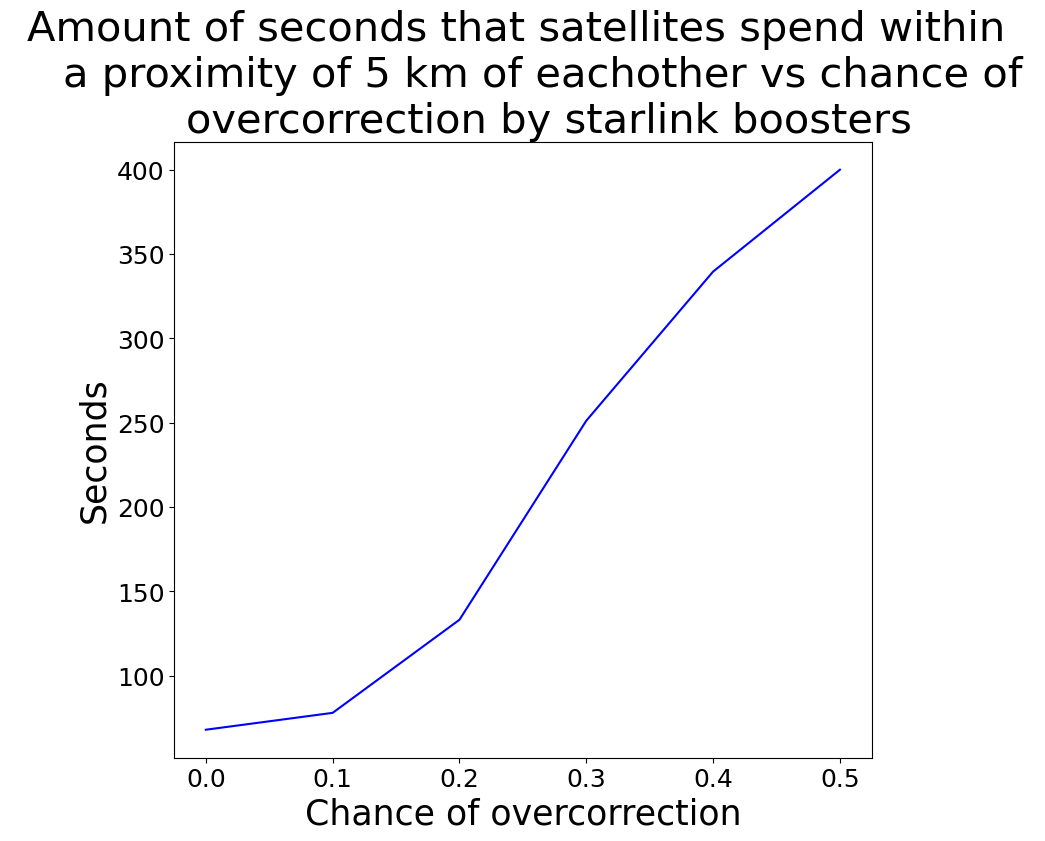

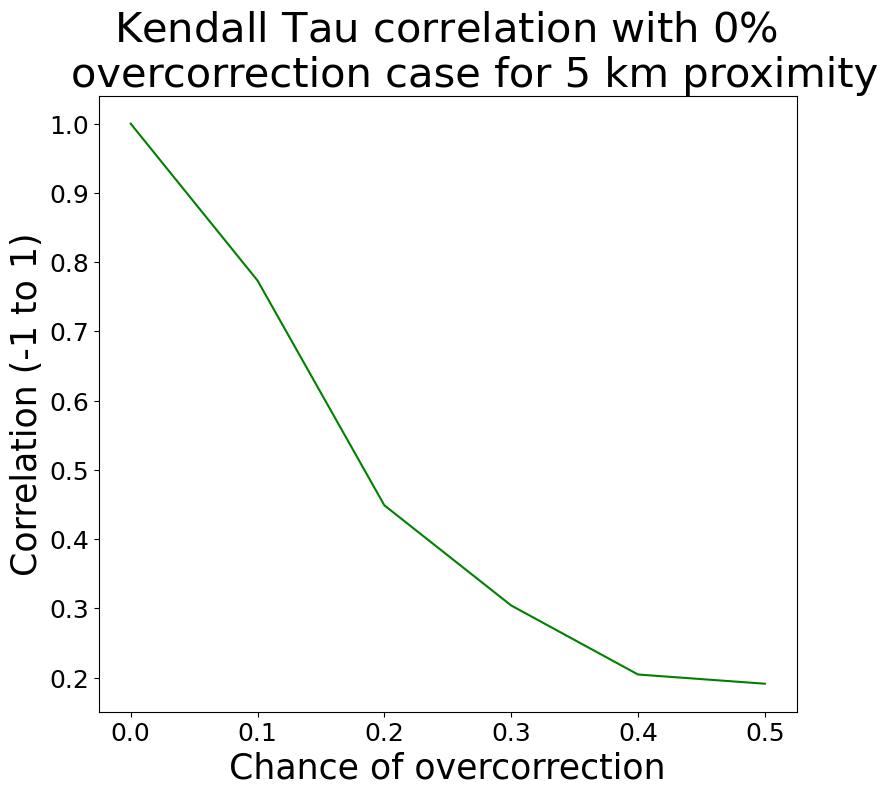

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hist_counts_0_5 = np.array(hist_data[0.5]).mean(axis = 0)
hist_counts_0_6 = np.array(hist_data[0.6]).mean(axis = 0)
hist_counts_0_7 = np.array(hist_data[0.7]).mean(axis = 0)
hist_counts_0_8 = np.array(hist_data[0.8]).mean(axis = 0)
hist_counts_0_9 = np.array(hist_data[0.9]).mean(axis = 0)
hist_counts_1_0 = np.array(hist_data[1.0]).mean(axis = 0)

data = {'0.5':  hist_counts_0_5[:, 1],
        '0.6':  hist_counts_0_6[:, 1],
        '0.7':  hist_counts_0_7[:, 1],
        '0.8':  hist_counts_0_8[:, 1],
        '0.9':  hist_counts_0_9[:, 1],
        '1.0':  hist_counts_1_0[:, 1]
        }
data2 = {'Total counts':  [np.sum(hist_counts_0_5[:, 1]), np.sum(hist_counts_0_6[:, 1]), np.sum(hist_counts_0_7[:, 1]), np.sum(hist_counts_0_8[:, 1]), np.sum(hist_counts_0_9[:, 1]), np.sum(hist_counts_1_0[:, 1])],
        'Chances':  [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        }

df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)
print(f"{df2}\n")
corr_matrix = df.corr(method='kendall')
print(corr_matrix)
df2["Chances"] = 1 - df2["Chances"] 

fig = plt.figure(figsize=(9, 8))
plt.plot(df2["Chances"], df2["Total counts"], color="blue")
plt.ylabel("Seconds", fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title(
    f"""Amount of seconds that satellites spend within 
    a proximity of 10 km of eachother vs chance of 
    overcorrection by starlink boosters""",
    fontsize=30,
)
plt.xlabel("Chance of overcorrection", fontsize=25)
plt.savefig("proximity_analysis_10km.png")
plt.show()

fig = plt.figure(figsize=(9, 8))
plt.plot(df2["Chances"], corr_matrix['1.0'], color="green")
plt.title(
    """Kendall Tau correlation with 0$\%$ 
    overcorrection case for 10 km proximity""", fontsize=30)
plt.ylabel("Correlation (-1 to 1)", fontsize=25)
plt.xlabel("Chance of overcorrection", fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig("kendall_corr_10km.png")
plt.show()

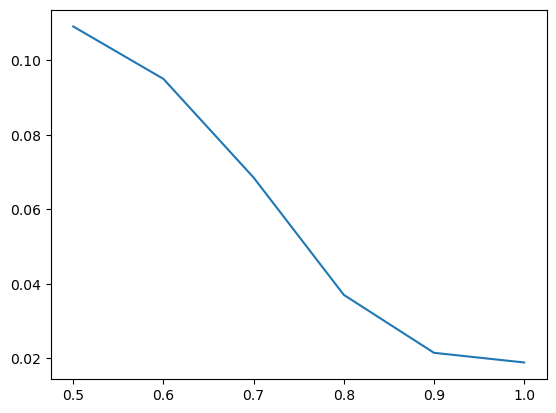

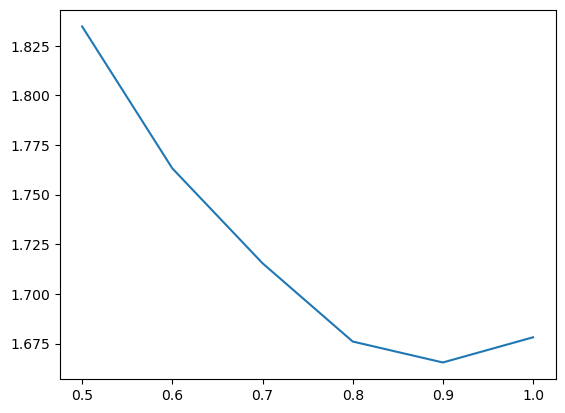

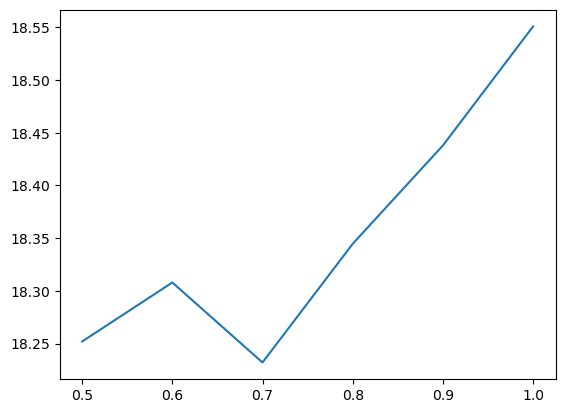

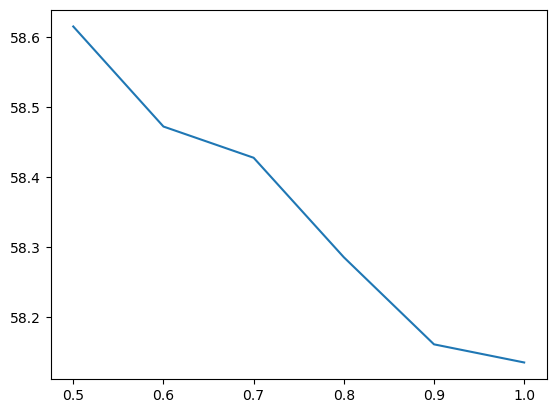

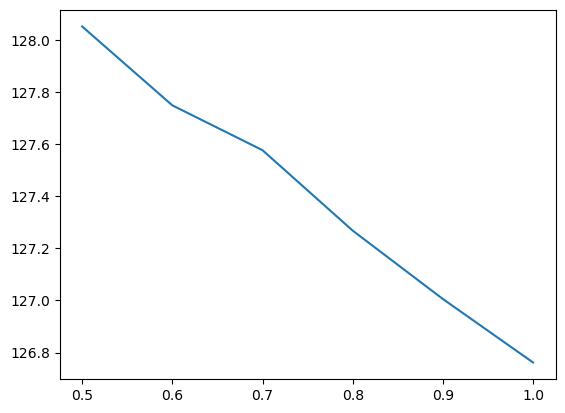

In [134]:
import matplotlib.pyplot as plt
import numpy as np

y = []
for chance in chances:
    y.append(np.array(hist_data[chance]).mean(axis = 0).mean(axis = 0))

for i in range(5):
    bin_y = np.array(y)[:, i]
    fig, ax = plt.subplots()
    ax.plot(chances, bin_y)